<a href="https://colab.research.google.com/github/mohamedseklani/Group-A-DLI-Assignment/blob/main/M_seklani(NB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import the packages to be used
import os       # to create directories and remove files
import numpy as np
import pandas as pd
import random

# set the random seed to ensure the result is reproducible
random.seed(10)
np.random.seed(10)

In [ ]:
# ==========================================
# 2. Unzip all csv files
# ==========================================
import os, zipfile, random, pandas as pd

zip_folder = "Dataset/LUFlow/2020/07"
extract_folder = zip_folder

for zip_file in os.listdir(zip_folder):
    if zip_file.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(zip_folder, zip_file), 'r') as z:
            z.extractall(extract_folder)

print("✅ All files extracted!")

# ==========================================
# 3. Combine all csv files into one
# ==========================================
def combine_csv_files(dataset_folder: str, reduce_sample_size: bool = False):
    combined_path = f"Dataset/dataset_combined/LUFlow_2020_07.csv"
    os.makedirs("Dataset/dataset_combined", exist_ok=True)

    # Remove old file if exists
    if os.path.isfile(combined_path):
        os.remove(combined_path)

    for i, file in enumerate(sorted(os.listdir(dataset_folder))):
        if not file.endswith(".csv"):
            continue
        with open(os.path.join(dataset_folder, file), "r") as infile, open(combined_path, "a") as outfile:
            for j, line in enumerate(infile):
                if 'Label' in line or 'label' in line:  # header
                    if i != 0 or j != 0:
                        continue
                elif reduce_sample_size and random.randint(1, 10) > 1:
                    continue
                outfile.write(line.replace(' ï¿½ ', '-'))

    print(f"✅ Combined CSV saved to {combined_path}")
    return combined_path

combined_csv = combine_csv_files("Dataset/LUFlow/2020/07")

# ==========================================
# 4. Load into pandas
# ==========================================
df = pd.read_csv(combined_csv)
print("Dataset shape:", df.shape)
print(df.head())

Cloning into 'LUFlow'...
remote: Enumerating objects: 665, done.
remote: Total 665 (delta 0), reused 0 (delta 0), pack-reused 665 (from 1)
Receiving objects: 100% (665/665), 4.55 GiB | 41.54 MiB/s, done.
Resolving deltas: 100% (149/149), done.
Updating files: 100% (242/242), done.
✅ All files extracted!
✅ Combined CSV saved to Dataset/dataset_combined/LUFlow_2020_07.csv


Step 2. Preliminary analysis

In [9]:
# read the dataset
luflow2020 = pd.read_csv('/content/Dataset/dataset_combined/LUFlow_2020_07.csv')
luflow2020.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,0,786,9200.0,0.000000,1,0,6,786,32890.0,1593574199100552,1593574199100552,0.000,benign,0.000000
1,0.0,0,2896,786,9200.0,4.263922,2,0,6,786,32862.0,1593574200046275,1593574200046255,12348.318,benign,0.000020
2,0.0,0,9091,786,9200.0,2.707474,7,3,6,786,32894.0,159357419905024,159357419905003,24613.643,benign,0.000210
3,0.0,0,0,786,32894.0,0.000000,3,0,6,786,9200.0,1593574199050402,1593574199050255,0.000,benign,0.000147
4,0.0,0,8878,786,9200.0,3.234329,7,0,6,786,32898.0,1593574199051268,1593574199051063,28714.371,benign,0.000205


In [10]:
print(f"Number of rows: {luflow2020.shape[0]}")
print(f"Number of columns: {luflow2020.shape[1]}")

Number of rows: 25056405
Number of columns: 16


In [11]:
print("Columns in the dataset:")
luflow2020.columns

Columns in the dataset:


Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')

In [12]:
print('Class distribution:')
luflow2020['label'].value_counts()

Class distribution:


,count
label,
benign,13962560
malicious,9042468
outlier,2051377


In [13]:
print('Class distribution (normalized):')
luflow2020['label'].value_counts()/luflow2020.shape[0]*100

Class distribution (normalized):


,count
label,
benign,55.724514
malicious,36.088449
outlier,8.187036


Check for null value

In [14]:
luflow2020_null_count = luflow2020.isnull().sum()
luflow2020_null_count = luflow2020_null_count[luflow2020_null_count > 0]
print(f"Rows contain null value: \n{luflow2020_null_count}\n")

luflow2020_null_count = luflow2020_null_count / luflow2020.shape[0] * 100
print(f"Rows contain null value (percentage): \n{luflow2020_null_count}\n")

Rows contain null value: 
dest_port    291973
src_port     291973
dtype: int64

Rows contain null value (percentage): 
dest_port    1.165263
src_port     1.165263
dtype: float64



Check for infinity value

In [15]:
print('Number of samples contains infinity value:')
np.isinf(luflow2020.iloc[:, :-2]).any(axis=1).sum()

Number of samples contains infinity value:


np.int64(0)

Check for columns that contain string values

In [16]:
luflow2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25056405 entries, 0 to 25056404
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   avg_ipt        float64
 1   bytes_in       int64  
 2   bytes_out      int64  
 3   dest_ip        int64  
 4   dest_port      float64
 5   entropy        float64
 6   num_pkts_out   int64  
 7   num_pkts_in    int64  
 8   proto          int64  
 9   src_ip         int64  
 10  src_port       float64
 11  time_end       int64  
 12  time_start     int64  
 13  total_entropy  float64
 14  label          object 
 15  duration       float64
dtypes: float64(6), int64(9), object(1)
memory usage: 3.0+ GB


Check for duplicates

In [17]:
# check for duplicated column
luflow2020.columns[luflow2020.columns.value_counts() > 1]

Index([], dtype='object')

In [18]:
luflow_duplicates = luflow2020[luflow2020.duplicated()]
print(f"{luflow_duplicates.shape[0]} rows are duplicates")
print(f"{luflow_duplicates.shape[0]/luflow2020.shape[0]*100:.2f}% of rows are duplicates")

24713 rows are duplicates
0.10% of rows are duplicates


Step 3. Dataset cleaning

In [19]:
# remove rows contain missing value
luflow2020 = luflow2020.dropna(how='any')
luflow2020.shape

(24764432, 16)

In [20]:
luflow2020 = luflow2020.drop_duplicates()
luflow2020.shape

(24740241, 16)

Step 4. Dataset preparation

In [21]:
attack = luflow2020[luflow2020['label']=='malicious']
benign = luflow2020[luflow2020['label']=='benign'].sample(n=len(attack)).reset_index(drop=True)

luflow2020_exclude_outlier = pd.concat([attack, benign])
del attack
del benign

luflow2020_exclude_outlier['label'].value_counts()

,count
label,
malicious,8781941
benign,8781941


Step 5. Save the dataset

In [22]:
# function to save the cleaned dataset
def save_cleaned_dataset(dataframe: pd.DataFrame,dataset: str, tag: str = ""):
    # create a new directory to save the cleaned dataset
    os.makedirs('./Dataset/dataset_cleaned', exist_ok=True)

    if not(tag == ""):
        tag = "_" + tag

    dataframe.to_csv(f'Dataset/dataset_cleaned/{dataset}{tag}.csv', index=False)

In [23]:
save_cleaned_dataset(dataframe=luflow2020_exclude_outlier, dataset='LUFlow')

Feature Selection

In [1]:
# import all necessary packages

# basic packages for data processing
import os       # to create directories and remove files
import pandas as pd
import numpy as np
import random # import random package to specify the random seed

# modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# modules to interpret the training result
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# silent the warning from the sklearn library
import warnings
warnings.filterwarnings('ignore')

# set the random seed to ensure the result is reproducible
random.seed(10)
np.random.seed(10)

In [2]:
# load the dataset
luflow = pd.read_csv('Dataset/dataset_cleaned/LUFlow.csv')
luflow = luflow.sample(frac=0.05).reset_index(drop=True)
luflow.shape

(878194, 16)

In [3]:
luflow['time_between'] = luflow['time_end'] - luflow['time_start']

luflow[['time_start', 'time_end', 'time_between', 'duration']]

,time_start,time_end,time_between,duration
0,1593663951458521,1593663951458521,0,0.000000
1,1594963278459617,1594963279290659,831042,0.831042
2,1593969869301692,1593969869301716,24,0.000024
3,1594486650900687,1594486650900687,0,0.000000
4,1595173218395869,1595173218396026,157,0.000157
...,...,...,...,...
878189,1594383597746373,1594383597755287,8914,0.008914
878190,1594037663868285,1594037663868285,0,0.000000
878191,1595128629684757,1595128629684757,0,0.000000
878192,1593911201605714,15939112019813,-1577972089585901,0.375586


In [4]:
luflow = luflow.drop(['src_ip', 'dest_ip', 'time_start', 'time_end', 'time_between'], axis=1)
luflow.head()

,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_port,total_entropy,label,duration
0,0.00,0,0,445.0,0.000000,1,0,6,36915.0,0.0000,malicious,0.000000
1,105.75,270,191,445.0,4.584393,6,6,6,4314.0,2113.4053,malicious,0.831042
2,0.00,0,4344,9200.0,3.123952,3,1,6,50734.0,13570.4470,benign,0.000024
3,0.00,0,0,13599.0,0.000000,1,1,6,46531.0,0.0000,malicious,0.000000
4,0.00,0,14480,9200.0,1.888626,10,0,6,47902.0,27347.3000,benign,0.000157


In [5]:
# seperate the features and the output variables into two dataframe
luflow_X = luflow.drop('label', axis=1).copy()
luflow_y = luflow['label'].copy()

In [6]:
%%time

rfc = RandomForestClassifier()
rfc.fit(luflow_X, luflow_y)

CPU times: user 3min 12s, sys: 189 ms, total: 3min 12s
Wall time: 3min 20s


RandomForestClassifier()

Top features: 
               importance score
feature                        
dest_port                 0.346
bytes_out                 0.147
total_entropy             0.128
src_port                  0.113
num_pkts_in               0.077
duration                  0.077
avg_ipt                   0.032
entropy                   0.026
bytes_in                  0.025
num_pkts_out              0.015
proto                     0.013


<Axes: xlabel='feature'>

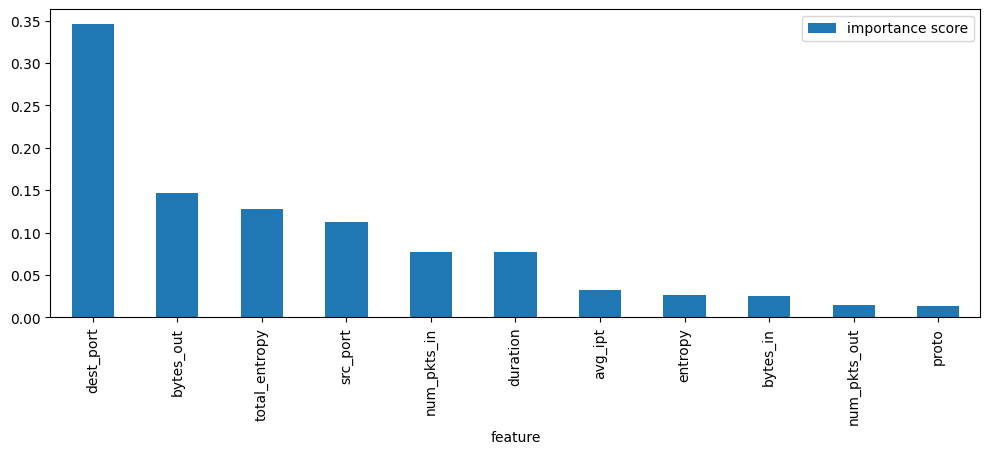

In [7]:
#extract the importance score
score = np.round(rfc.feature_importances_, 3)
importance = pd.DataFrame({'feature': luflow_X.columns,
                             'importance score': score})
importance = importance.sort_values('importance score', ascending=False).set_index('feature')

print(f"Top features: \n{importance}")

plt.rcParams['figure.figsize'] = (12, 4)
importance.plot.bar()

In [8]:
def save_feature(features: pd.Series, dataset_name: str, algorithm: str, tag: str = ""):

    feature_count = features.shape[0]

    if not(tag == ""):
        tag = "_" + tag

    directory = 'Dataset/features_selected'
    file_name = f"{dataset_name}_{algorithm}_{feature_count}{tag}"

    # create directory to save the file
    os.makedirs(directory, exist_ok=True)

    features.to_csv(f"{directory}/{file_name}.csv", index=False, columns=None)

    print(f"The features have been saved in {directory}/{file_name}.csv")

In [9]:
# save the ranking of the features in a CSV file
features = pd.Series(importance.index[:], dtype='str')
save_feature(features=features,
            dataset_name='LUFlow',
            algorithm='RandomForestClassifier')

The features have been saved in Dataset/features_selected/LUFlow_RandomForestClassifier_11.csv


In [10]:
# define ML models without optimized hyperparameter
models = {
    'Naive Bayes': GaussianNB()
}

In [11]:
luflow_train_X, luflow_test_X, luflow_train_y, luflow_test_y = train_test_split(luflow_X, luflow_y, test_size=0.3)

In [12]:
feature_set = []
scalar = StandardScaler()
scores = []

for feature in features:
    feature_set.append(feature)
    print(f"Added feature {len(feature_set)} ({feature}) ...")

    test_X = luflow_test_X[feature_set]
    train_X = luflow_train_X[feature_set]

    # scale the dataset
    train_X_scaled = scalar.fit(train_X)
    train_X_scaled = scalar.transform(train_X)
    test_X_scaled = scalar.transform(test_X)

    score_temp = [len(feature_set)]

    for model in models:
        clf = models[model]
        clf.fit(train_X_scaled, luflow_train_y)

        prediction = clf.predict(test_X_scaled)
        accuracy = metrics.accuracy_score(luflow_test_y, prediction)

        score_temp.append(accuracy)

    scores.append(score_temp)


scores = np.array(scores)

Added feature 1 (dest_port) ...
Added feature 2 (bytes_out) ...
Added feature 3 (total_entropy) ...
Added feature 4 (src_port) ...
Added feature 5 (num_pkts_in) ...
Added feature 6 (duration) ...
Added feature 7 (avg_ipt) ...
Added feature 8 (entropy) ...
Added feature 9 (bytes_in) ...
Added feature 10 (num_pkts_out) ...
Added feature 11 (proto) ...


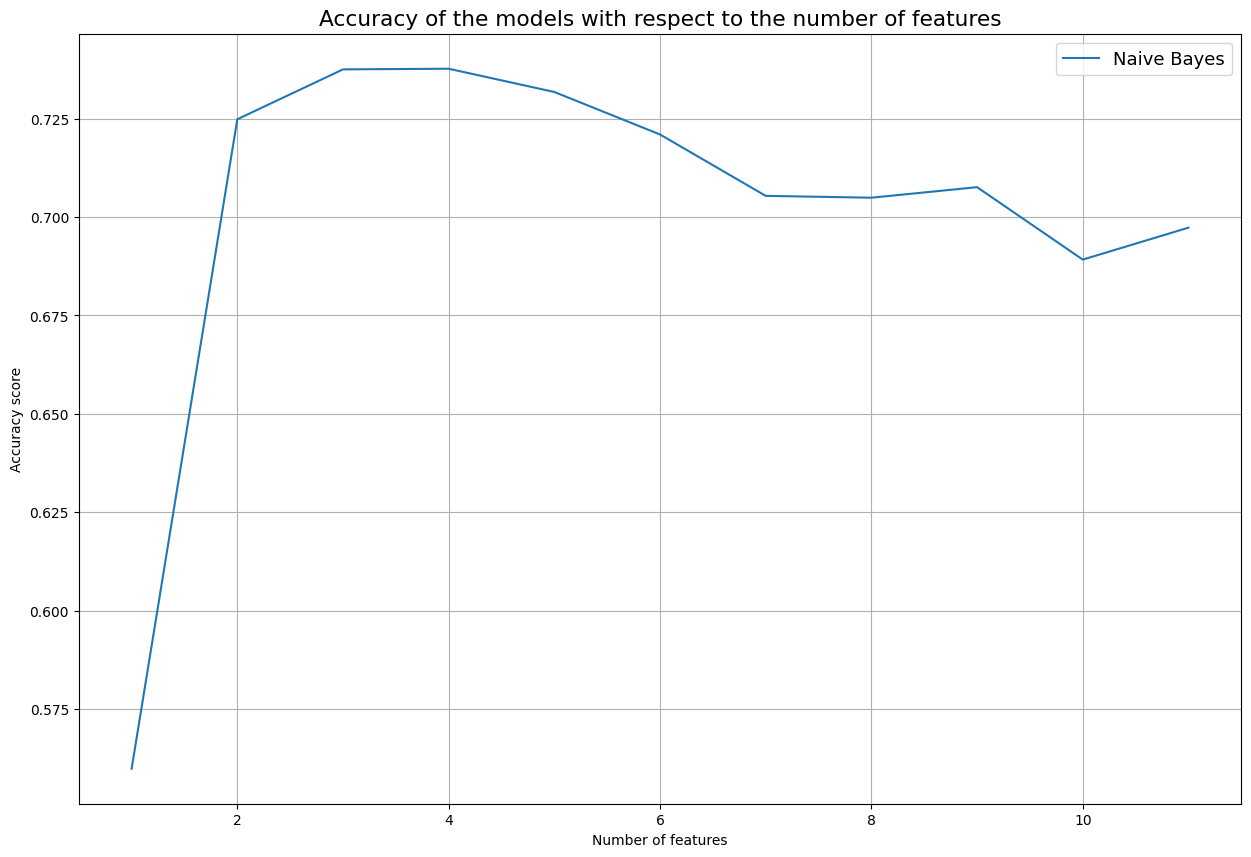

In [13]:
plt.figure(figsize=(15, 10))
for index, model in enumerate(models):
    plt.plot(scores.T[0], scores.T[index + 1], label=model)

plt.rcParams.update({'font.size': 13})
plt.title('Accuracy of the models with respect to the number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid()
plt.show()

In [14]:
# import all of the packages that will be used

# basic packages for data processing
import pandas as pd
import numpy as np

# packages for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# packages to interpret the training result
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# set the random seed to ensure the result is reproducible
import random
random.seed(10)
np.random.seed(10)

In [15]:
features = pd.read_csv('/content/Dataset/features_selected/LUFlow_RandomForestClassifier_11.csv').squeeze()
features = features[:6]

In [16]:
columns = features.tolist() +  ['label']

luflow2020 = pd.read_csv('/content/Dataset/dataset_cleaned/LUFlow.csv', usecols=columns)
luflow2020.shape

(17563882, 7)

In [17]:
luflow2020 = luflow2020.sample(frac=0.05).reset_index(drop=True)
print('Class distribution: ')
luflow2020['label'].value_counts()

Class distribution: 


,count
label,
benign,439846
malicious,438348


In [18]:
luflow2020_X = luflow2020.drop('label', axis=1).copy()
luflow2020_y = luflow2020['label'].copy()

luflow2020_train_X, luflow2020_test_X, luflow2020_train_y, luflow2020_test_y = train_test_split(luflow2020_X, luflow2020_y, test_size=0.3)

In [19]:
scalar = StandardScaler()

luflow2020_train_X_scaled = scalar.fit_transform(luflow2020_train_X)
luflow2020_test_X_scaled = scalar.transform(luflow2020_test_X)

In [20]:
%%time

parameter_space = [
    {'var_smoothing': np.logspace(0, -9, num=100)}
]

optimal_nb = GridSearchCV(
                        GaussianNB(),
                        parameter_space,
                        cv=5,
                        n_jobs=-1,
                        verbose=0
)

optimal_nb.fit(luflow2020_train_X_scaled, luflow2020_train_y)
nb_optimal_params = optimal_nb.best_params_
print(f"Optimum hyperparameters: \n{nb_optimal_params}")

Optimum hyperparameters: 
{'var_smoothing': np.float64(4.3287612810830526e-07)}
CPU times: user 30.1 s, sys: 2.82 s, total: 32.9 s
Wall time: 13min 23s


In [21]:
prediction = optimal_nb.predict(luflow2020_test_X_scaled)
accuracy = metrics.accuracy_score(luflow2020_test_y, prediction)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.71988
